# University of science
## Advanced Machine Learning - Lab 02
## Nguyễn Quốc Bảo - 18110053

 **lab02**

Ở bài thực hành tuần này chúng ta sẽ làm quen với mạng Alexnet trên tập cifar10

cifar10 là một tập ảnh màu có 10 labels bao gồm:
*   airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Load data & split data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


Khác với bài thực hành trước, bài này ta sẽ thực hành với ảnh màu

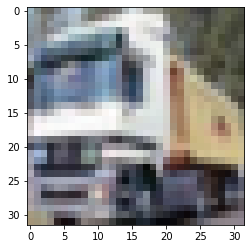

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(X_train[1])
plt.show()

In [4]:
#Normalize ảnh
X_train, X_test = X_train/255.0, X_test/255.0

#in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

#Model

Bài thực hành này ta sẽ làm quen với dạng Sequential của keras và các layer mới như dropout và batchnormalization

## AlexNet

In [6]:
np.random.seed(1000)

#Khởi tạo
AlexNet = Sequential()

#Block 1
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same')) #padding ="same" nghĩa là giữ 
                                                                                                         #nguyên kích thước ban đầu của input
AlexNet.add(Activation('relu')) #Có thể bỏ activation vào layer Conv như bài thực hành 1 cũng được
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')) #Overlapping MaxPooling

#Block 2
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Block 3
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))

#Block 4
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))

#Block 5
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Flatten
AlexNet.add(Flatten())
# Lớp Fc1
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))
# Dropout
AlexNet.add(Dropout(rate=0.4))# rate: xác suất bị drop

#Lớp Fc2
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Dropout
AlexNet.add(Dropout(rate=0.4))

#Lớp Fc3
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Dropout
AlexNet.add(Dropout(rate=0.4))

#Lớp cuối cùng
AlexNet.add(Dense(10))
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 384)         8

Ta có 2 loại losses cho bài toán classification là categorical_crossentropy và sparse_categorical_crossentropy
* categorical_crossentropy nhận label dạng onehot
* sparse_categorical_crossentropy nhận label dạng các chữ số 

In [7]:
AlexNet.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy'])

#Train

In [8]:
### Tạo một callback ModelCheckpoint: callback này sẽ lưu model mỗi khi tìm được một model tốt hơn
#### filepath: đường dẫn file muốn lưu
#### monitor: đại lượng quyết định xem model có "tốt hơn" hay không
#### mode='auto'/'max'/'min': đại lượng monitor lớn hay nhỏ là tốt hơn
#### verbose: có thông báo mỗi lần lưu ko
#### save_best_only: chỉ lưu model tốt nhất
mc = tf.keras.callbacks.ModelCheckpoint(filepath="epoch: {epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=False)

## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
history = AlexNet.fit(X_train, y_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])         ##sử dụng callback ModelCheckpoint trong quá trình train



Epoch 1/30
176/176 [==============================] - 47s 88ms/step - loss: 1.8829 - accuracy: 0.3128 - val_loss: 2.2894 - val_accuracy: 0.2392
Epoch 2/30
176/176 [==============================] - 14s 78ms/step - loss: 1.4711 - accuracy: 0.4590 - val_loss: 2.2039 - val_accuracy: 0.3654
Epoch 3/30
176/176 [==============================] - 14s 78ms/step - loss: 1.3265 - accuracy: 0.5182 - val_loss: 1.8405 - val_accuracy: 0.4820
Epoch 4/30
176/176 [==============================] - 14s 78ms/step - loss: 1.2316 - accuracy: 0.5545 - val_loss: 1.4046 - val_accuracy: 0.4826
Epoch 5/30
176/176 [==============================] - 14s 78ms/step - loss: 1.1486 - accuracy: 0.5894 - val_loss: 1.3422 - val_accuracy: 0.5124
Epoch 6/30
176/176 [==============================] - 14s 78ms/step - loss: 1.0775 - accuracy: 0.6168 - val_loss: 1.3037 - val_accuracy: 0.5292
Epoch 7/30
176/176 [==============================] - 14s 78ms/step - loss: 1.0068 - accuracy: 0.6442 - val_loss: 1.2940 - val_accuracy:

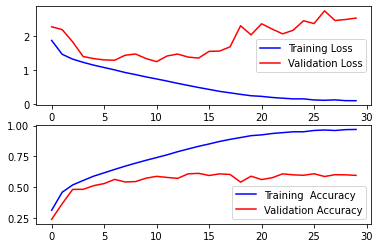

In [9]:
#Vẽ thử đồ thị

f,ax=plt.subplots(2,1) 


ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

ax[1].legend()
plt.show()

In [14]:
#ta chọn epoch thứ 10 làm best model
model = tf.keras.models.load_model("/content/epoch: 10.hdf5")
result = AlexNet.evaluate(X_test,y_test)
print("loss và accuracy trên tập test là {} {}".format(result[0],result[1]))

313/313 [==============================] - 3s 9ms/step - loss: 2.6254 - accuracy: 0.5935
loss và accuracy trên tập test là 2.6253654956817627 0.593500018119812


#Bài tập 
Hãy code thử mạng VGG16 và nêu cách chọn ra epoch thứ bao nhiêu làm cho model tốt nhất 
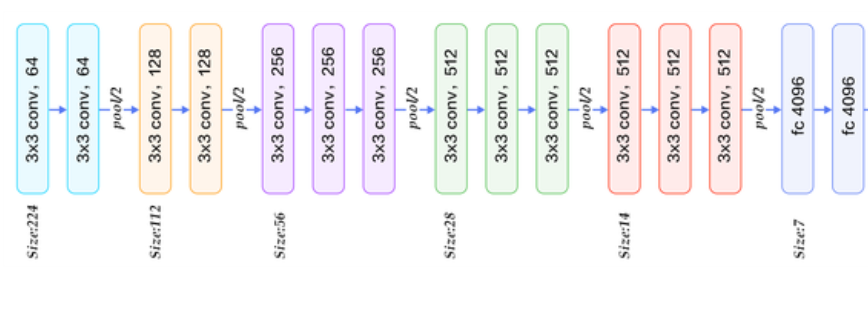
* Lưu lý:
1. Ta phải thêm vào lớp cuối để định nghĩa cho output
2. Ta phải code theo dạng Sequential

#Gợi ý

In [ ]:
def build_model():
    model = Sequential()
    #Block 1 của mạng vgg16
    model.add(tf.keras.layers.Conv2D(filters=64,
                                    input_shape=(32,32,3),
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters=64,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],
                                            strides=[2,2]))
    #Block 2
    model.add(tf.keras.layers.Conv2D(filters= 128,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters= 128,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],
                                            strides=[2,2]))
    #Block 3
    model.add(tf.keras.layers.Conv2D(filters= 256,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters= 256,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters= 256,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],
                                            strides=[2,2]))
    # Block 4
    model.add(tf.keras.layers.Conv2D(filters= 512,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters= 512,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters= 512,
                                    kernel_size=[3,3],
                                    strides=[1,1],
                                    padding="same",
                                    activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],
                                            strides=[2,2]))
    #Block cuối
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=4096, 
                                activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=4096, 
                                activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=10,
                                    activation='softmax'))
    #............................................
    model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
                    optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
VGG16 = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/Course/AD_MachineLearning/Pratice/2021/save_model/VGG16/epoch:{epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=True)
history = VGG16.fit(X_train, y_train,
                    batch_size=256,
                    epochs=25,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])

Epoch 1/25
176/176 [==============================] - 71s 212ms/step - loss: 2.0273 - accuracy: 0.2194 - val_loss: 1.7592 - val_accuracy: 0.3294
Epoch 2/25
176/176 [==============================] - 33s 187ms/step - loss: 1.6869 - accuracy: 0.3573 - val_loss: 1.6701 - val_accuracy: 0.3804
Epoch 3/25
176/176 [==============================] - 33s 187ms/step - loss: 1.4989 - accuracy: 0.4391 - val_loss: 1.4289 - val_accuracy: 0.4756
Epoch 4/25
176/176 [==============================] - 33s 187ms/step - loss: 1.3788 - accuracy: 0.4906 - val_loss: 1.3078 - val_accuracy: 0.5170
Epoch 5/25
176/176 [==============================] - 33s 188ms/step - loss: 1.2940 - accuracy: 0.5254 - val_loss: 1.2804 - val_accuracy: 0.5360
Epoch 6/25
176/176 [==============================] - 33s 187ms/step - loss: 1.2117 - accuracy: 0.5565 - val_loss: 1.1664 - val_accuracy: 0.5774
Epoch 7/25
176/176 [==============================] - 33s 188ms/step - loss: 1.1372 - accuracy: 0.5868 - val_loss: 1.1171 - val_ac

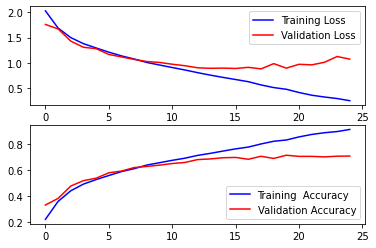

In [ ]:
#Vẽ thử đồ thị

f,ax=plt.subplots(2,1) 


ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

ax[1].legend()
plt.show()

Để ta tìm epoch làm cho model tốt nhất, nghĩa là sao cho loss càng thấp càng tốt, accuracy càng cao càng tốt. Vậy cách để chọn là ta nhìn vào biểu đồ loss và accurracy tại điểm bắt đầu phân tách ra 2 hướng tách biệt, chính là điểm tốt nhất để chọn ra epoch phù hợp cho model có thể đánh giá, nghĩa là tại điểm đó Validation loss không còn giảm nhiều hoặc validation accuracy không tăng nhiều nữa, nếu chỉ chọn theo accuracy càng cao hoặc loss càng thấp có thể dẫn đến có khả năng bị overfitting.

In [ ]:
def evaluate_model(model, test, test_labels):
    #Xem độ chính xác trên tập test
    evaluation = model.evaluate(test, test_labels, verbose=1)
    print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))
evaluate_model(VGG16, X_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.1266 - accuracy: 0.6968
Model có độ chính xác là 0.6967999935150146 và loss là 1.1265592575073242


Với trường hợp như hình trên ta có thể chọn epoch thứ 14 làm best model

In [ ]:
model_recall = tf.keras.models.load_model("/content/drive/MyDrive/Course/AD_MachineLearning/Pratice/2021/save_model/VGG16/epoch:14.hdf5")

In [ ]:
evaluate_model(model_recall, X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.8980 - accuracy: 0.6844
Model có độ chính xác là 0.6844000220298767 và loss là 0.8980284333229065
